In [1]:
import pandas as pd

In [13]:
df = pd.read_csv("results.csv")

points = []

# for _, row in df.iterrows():
#     methods[row['method']] = {}

for _, row in df.iterrows():
    points.append({
        'method': row['method'],
        'mse': row['mse'],
        'time': row['time'],
    })

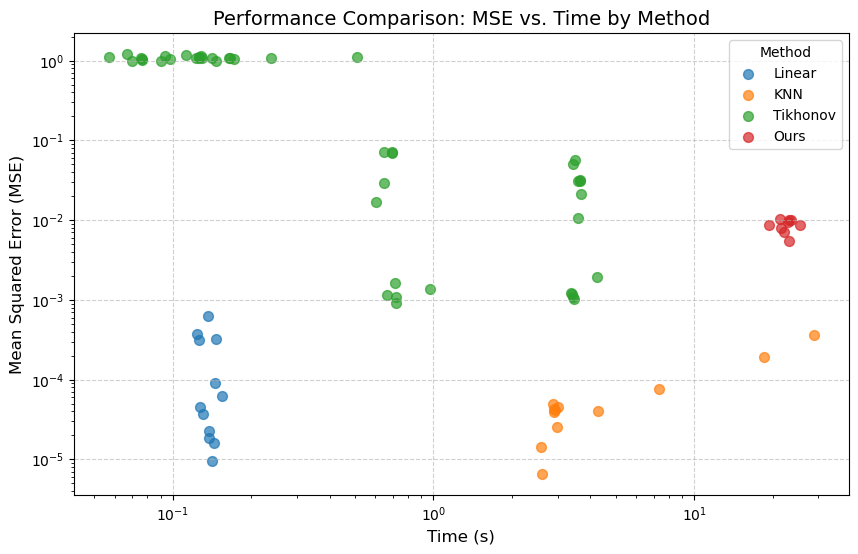

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is the DataFrame you are iterating over
# (A simulated DataFrame was used for execution)
df = pd.read_csv("results.csv")

fig, ax = plt.subplots(figsize=(10, 6))

# Get unique methods for coloring
methods = df['method'].unique()

for method in methods:
    # Filter data for the current method
    subset_base = df[np.logical_and(df['method'] == method, df['stage'] == 'tet')]
    subset_time = subset_base
    subset_mse = subset_base
    if method == 'tikhonov':
        idxs = np.logical_and(np.logical_and(df['method'] == method, df['stage'] == 'tet'))
        idxs = np.logical_and(idxs, df['full_graph'])
        subset_time = df[np.logical_and(idxs, df['gpu'])]
        subset_mse = df[np.logical_and(idxs, np.logical_not(df['gpu']))]
    
    # Create the scatter plot for this method, generating a unique color for each call
    ax.scatter(
        subset_time['time'],
        subset_mse['mse'],
        label=method, # Label for the legend
        s=50, # Size of the points
        alpha=0.7 # Transparency
    )

# Add labels and title
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax.set_title('Performance Comparison: MSE vs. Time by Method', fontsize=14)

# Add legend to show method color
ax.legend(title='Method')

# Add grid for better readability
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(True, linestyle='--', alpha=0.6)

# Save the plot
plt.savefig('scatter_plot_mse_vs_time.png')

<BarContainer object of 4 artists>

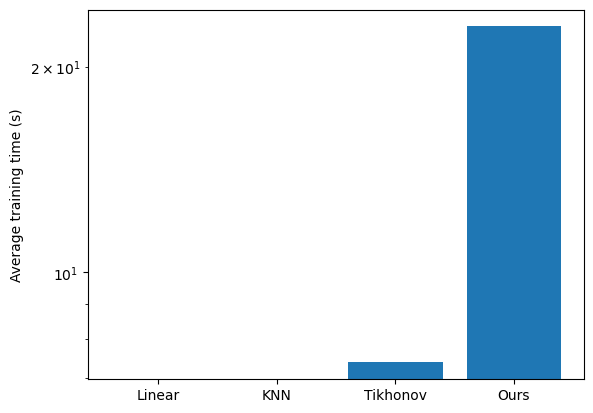

In [25]:
methods = ['Linear', 'KNN', 'Tikhonov', 'Ours']
training_times = [0, 0, 7.379856586456299, 22.916114568710327]

# plt.xlabel('Method')
plt.ylabel('Average training time (s)')
plt.yscale('log')
plt.bar(methods, training_times)